In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
car_data = pd.read_csv("car_data.csv")

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 803
Data columns (total 12 columns):
Price       804 non-null float64
Mileage     804 non-null int64
Make        804 non-null object
Model       804 non-null object
Trim        804 non-null object
Type        804 non-null object
Cylinder    804 non-null int64
Liter       804 non-null float64
Doors       804 non-null int64
Cruise      804 non-null int64
Sound       804 non-null int64
Leather     804 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 81.7+ KB


In [5]:
mileage = car_data['Mileage']
price = car_data['Price']

In [11]:
transposed_mileage = np.array(mileage.values.reshape(-1, 1))
transposed_price = np.array(price.values.reshape(-1, 1))

In [14]:
regr1 = linear_model.LinearRegression()
regr1.fit(transposed_mileage, transposed_price)
print('Coefficients: \n', regr1.coef_)
print(regr1.score(transposed_mileage, transposed_price))

Coefficients: 
 [[-0.1725205]]
0.0204634473235


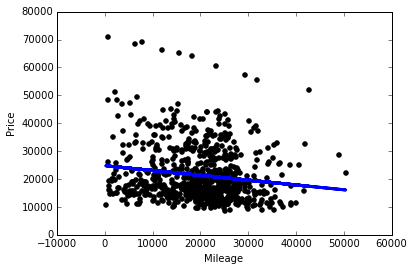

In [13]:
plt.scatter(transposed_mileage, transposed_price,  color='black')
plt.plot(transposed_mileage, regr1.predict(transposed_mileage), color='blue', linewidth=3)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# With a score of .02 this is not a great fit at all!!!!

# Now lets find a better fit comparing more things!

In [21]:
# mileage, cylinders, liters, doors, cruise, sound, and leather to price

car_details = car_data[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Price']]

In [22]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 803
Data columns (total 8 columns):
Mileage     804 non-null int64
Cylinder    804 non-null int64
Liter       804 non-null float64
Doors       804 non-null int64
Cruise      804 non-null int64
Sound       804 non-null int64
Leather     804 non-null int64
Price       804 non-null float64
dtypes: float64(2), int64(6)
memory usage: 56.5 KB


In [23]:
car_details.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,6,3.1,4,1,1,1,17314.103129
1,9135,6,3.1,4,1,1,0,17542.036083
2,13196,6,3.1,4,1,1,0,16218.847862
3,16342,6,3.1,4,1,0,0,16336.913140
4,19832,6,3.1,4,1,0,1,16339.170324


In [29]:
import itertools
dependent_vars = list(car_details.columns)
dependent_vars.remove('Price')
combos = list(itertools.combinations(dependent_vars, 2))
combo3 = list(itertools.combinations(dependent_vars, 3))
combo4 = list(itertools.combinations(dependent_vars, 4))
combo5 = list(itertools.combinations(dependent_vars, 5))
combo6 = list(itertools.combinations(dependent_vars, 6))
combo7 = list(itertools.combinations(dependent_vars, 7))

In [25]:
def regression_for(combo):
    combo = list(combo)
    df2 = car_details.loc[:, combo + ['Price']]
    df2.dropna(inplace=True)
    input_data = df2[combo]
    price = df2['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)

# What is the best 2 item combo?

In [26]:
choices = []

for combo in combos:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Cylinder', 'Cruise'), 0.38394913240273443)
[ 3392.58658184  6000.36575223] -1046.43091026


# What is the best 3 item combo?

In [27]:
choices = []

for combo in combo3:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Cylinder', 'Cruise', 'Leather'), 0.40380272693971553)
[ 3276.23282876  6362.34303311  3139.48422665] -2978.39804555


# What is the best 4 item combo?

In [28]:
choices = []

for combo in combo4:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Mileage', 'Cylinder', 'Cruise', 'Leather'), 0.42250742147747633)
[ -1.65135166e-01   3.23265650e+03   6.49203513e+03   3.16156859e+03] 412.562291279


# What is the best 5 item combo?

In [30]:
choices = []

for combo in combo5:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'), 0.4369402151237245)
[ -1.67237436e-01   3.25764291e+03  -1.40211174e+03   6.31963605e+03
   2.97888714e+03] 5530.33460527


# What is the best 6 item combo?

In [31]:
choices = []

for combo in combo6:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.44569092105870245)
[ -1.70517079e-01   3.20012460e+03  -1.46339906e+03   6.20551127e+03
  -2.02440071e+03   3.32714331e+03] 7323.16430984


# How about we just combo EVERYTHING!!!!

In [32]:
choices = []

for combo in combo7:
    regr, score = regression_for(combo)
    choices.append((combo, score))
                   
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_) 

(('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.4462643536728379)
[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03] 6758.7551436


###Hmm so we see that when you combo "Mileage", "Cylinders", "Doors", "Cruise", "Sound", and "Leather" we achieve a score of only 0.445 and then by adding in the final column of "Liter" we see a very small increase in our score to 0.446

### I am willing to bet that adding "Make", "Model" and "Body type" into the mix, we will see much better scores 